# NBA Game Statistics Data Wrangling

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.pipeline import Pipeline

import sqlite3
import seaborn as sns
import plotly.express as px

pd.options.display.max_rows = 4000

## Get the game data
download data from here and save in the same folder of this file:    
https://www.kaggle.com/michaelschmidek/sql-data-analysis-nba/data

In [4]:
# you might need to pip install the following libraries
#pip install plotly.express
#pip install kaleido

### Pull game data from basketball.sqlite

In [5]:
#path = ".." #Everything preceding the file name
database = 'basketball.sqlite' #The path + the file name

# sqlite3.connect() Creates a connection object
# database is the variable we established above
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables
#usless tables: Team (redundant info), Player_Photos, News_Missing, news(earliest is this year april)
# Team_Salary, Player_Salary (only has 2020 and later), Team_History

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,"CREATE TABLE ""Player"" (\n""id"" TEXT,\n ""full_n..."
1,table,Team,Team,4,"CREATE TABLE ""Team"" (\n""id"" TEXT,\n ""full_nam..."
2,table,Team_Attributes,Team_Attributes,5,"CREATE TABLE ""Team_Attributes"" (\n""ID"" TEXT,\n..."
3,table,Team_History,Team_History,6,"CREATE TABLE ""Team_History"" (\n""ID"" TEXT,\n ""..."
4,table,Player_Attributes,Player_Attributes,15,"CREATE TABLE ""Player_Attributes"" (\n""ID"" TEXT,..."
5,table,Game_Officials,Game_Officials,8375,"CREATE TABLE ""Game_Officials"" (\n""OFFICIAL_ID""..."
6,table,Game_Inactive_Players,Game_Inactive_Players,8997,"CREATE TABLE ""Game_Inactive_Players"" (\n""PLAYE..."
7,table,Team_Salary,Team_Salary,13415,CREATE TABLE `Team_Salary` (\n `nameTeam` TEX...
8,table,Player_Salary,Player_Salary,23558,CREATE TABLE `Player_Salary` (\n `slugSeason`...
9,table,Draft,Draft,23559,"CREATE TABLE `Draft` (\n `yearDraft` REAL,\n ..."


In [7]:
Game = pd.read_sql("""
SELECT  
    --IDs and basic info for joining
   GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ID_AWAY,GAME_DATE,SEASON,
   LAST_GAME_ID,LAST_GAME_HOME_TEAM_ID,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_DATE_EST,
   
   -- outcome variables
   WL_HOME, PTS_HOME,PTS_AWAY, PLUS_MINUS_HOME, --margin
   
   MIN_HOME,MIN_AWAY,GAME_SEQUENCE, GAME_STATUS_TEXT,ATTENDANCE,
   --DATE_PART('WEEKDAY', GAME_DATE) as game_weekday,
   
   FGM_HOME,FGA_HOME,FG_PCT_HOME,
   FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,
   DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,
   
   FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,
   FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,
   DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,
   
   PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,
   LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,
   TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,
   
   PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,
   PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,
   TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,
   
   PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,
   PTS_OT3_HOME,PTS_OT4_HOME,
   PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,
   PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,
   
   LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,
   SERIES_LEADER, PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS
   
  FROM Game
    where GAME_DATE >= '1996-11-01' -- where most of the field start to have data
   -- limit 20
    
    ;""", conn)

print(pd.read_sql("""SELECT count(*) FROM Game;""", conn))




   count(*)
0     62448


**Save data to file**

In [9]:
Game.to_csv('game.csv', sep=',')

**Read game data from file**

In [10]:
game_df = pd.read_csv('game.csv')

In [11]:
game_df.head()

,Unnamed: 0,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ID_AWAY,GAME_DATE,SEASON,LAST_GAME_ID,LAST_GAME_HOME_TEAM_ID,LAST_GAME_VISITOR_TEAM_ID,...,PTS_OT3_AWAY,PTS_OT4_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS
0,0,29600002,21996,1610612751,1610612739,1996-11-01,1996,29500765.0,1.610613e+09,1.610613e+09,...,0.0,0.0,74.0,103.0,0.0,4.0,Cleveland,0.0,0.0,0.0
1,1,29600009,21996,1610612745,1610612758,1996-11-01,1996,29501059.0,1.610613e+09,1.610613e+09,...,0.0,0.0,91.0,96.0,4.0,0.0,Houston,0.0,0.0,0.0
2,2,29600010,21996,1610612743,1610612742,1996-11-01,1996,29501162.0,1.610613e+09,1.610613e+09,...,0.0,0.0,98.0,132.0,1.0,3.0,Dallas,0.0,0.0,0.0
3,3,29600011,21996,1610612762,1610612760,1996-11-01,1996,49500062.0,1.610613e+09,1.610613e+09,...,0.0,0.0,86.0,90.0,3.0,1.0,Utah,0.0,0.0,0.0
4,4,29600003,21996,1610612755,1610612749,1996-11-01,1996,29500680.0,1.610613e+09,1.610613e+09,...,0.0,0.0,104.0,101.0,1.0,3.0,Milwaukee,0.0,0.0,0.0


Create Win loss variable for home game due to missing value

In [12]:
conditions = [
    (game_df['PLUS_MINUS_HOME'] < 0),
    (game_df['PLUS_MINUS_HOME'] == 0),
    (game_df['PLUS_MINUS_HOME'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['L', 'T', 'W']

# create a new column and use np.select to assign values to it using our lists as arguments
game_df['WL_Home_modified'] = np.select(conditions, values)

In [23]:
Game_modified = game_df.copy()

**Check whether there's a difference in NBA rule change before and after 2005**    
Since rule change created different patterns in the features, prior to 2005 game stats are less relevant to recent games

<Figure size 432x288 with 0 Axes>

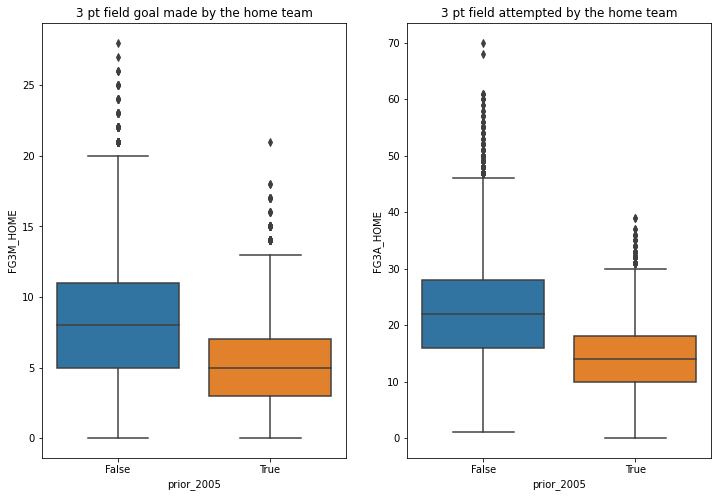

In [24]:
# add feature game prior to 2005 rule change
Game_modified['prior_2005'] = Game['SEASON'].astype('int') <2005

plt.figure()
f, axes = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot(y='FG3M_HOME', x= 'prior_2005', 
            data=Game_modified,  orient='v' , ax=axes[0]).set_title('3 pt field goal made by the home team')
sns.boxplot(y='FG3A_HOME', x= 'prior_2005', 
            data=Game_modified,  orient='v' , ax=axes[1]).set_title('3 pt field attempted by the home team')

plt.show()

Game_modified = Game_modified.drop(['prior_2005'], axis = 1)

Drop columns that are not usefull for the model

In [14]:
Game_modified = Game_modified.drop(['SEASON_ID','GAME_SEQUENCE', 'LAST_GAME_ID','LAST_GAME_HOME_TEAM_ID',
                                    'LAST_GAME_VISITOR_TEAM_ID','LAST_GAME_DATE_EST',
                                    'PTS_AWAY','PTS_HOME','WL_HOME','MIN_AWAY','HOME_TEAM_WINS', 'HOME_TEAM_LOSSES',
                                   'LAST_GAME_HOME_TEAM_POINTS', 'LAST_GAME_VISITOR_TEAM_POINTS',
                                    'SERIES_LEADER','ATTENDANCE','GAME_STATUS_TEXT','Unnamed: 0'
                                   ], axis = 1)

DROP columns: FGM, FG3M, FTM, REB, GP, MIN.    
Reason: FGM, FG3M, FTM are linear combinations of (FGA, FG3A, FT_PCT) * (FG_PCT, FG3_PCT, FT_PCT) respectively.    
REB is a linear combination of DREB + OREB.    

In [15]:
Game_modified = Game_modified.drop(['FGM_HOME','FG3M_HOME','FTM_HOME','REB_HOME',
                                    'FGM_AWAY','FG3M_AWAY','FTM_AWAY','REB_AWAY',
                                   ], axis = 1)

Other columns that can drop

In [16]:
Game_modified = Game_modified.drop(['LARGEST_LEAD_HOME','LEAD_CHANGES_HOME','TIMES_TIED_HOME', 'LARGEST_LEAD_AWAY',
                                    'LEAD_CHANGES_AWAY', 'TIMES_TIED_AWAY','PTS_OFF_TO_AWAY', 'PTS_QTR1_HOME',
                                    'PTS_QTR2_HOME','PTS_QTR3_HOME','PTS_QTR4_HOME','PTS_OT1_HOME', 'PTS_OT2_HOME', 
                                    'PTS_OT3_HOME', 'PTS_OT4_HOME','PTS_QTR1_AWAY','PTS_QTR2_AWAY','PTS_QTR3_AWAY',
                                    'PTS_QTR4_AWAY','PTS_OT1_AWAY', 'PTS_OT2_AWAY','PTS_OT3_AWAY','PTS_OT4_AWAY',
                                    'PT_AVAILABLE','PT_XYZ_AVAILABLE','HUSTLE_STATUS'
                                   ], axis = 1)
   

Cast features to the correct data types

In [25]:
Game_modified = Game_modified[game_df['SEASON'].astype('int')>=2004]

In [26]:
Game_modified.convert_dtypes().dtypes   

Unnamed: 0                         Int64
GAME_ID                            Int64
SEASON_ID                          Int64
TEAM_ID_HOME                       Int64
TEAM_ID_AWAY                       Int64
GAME_DATE                         string
SEASON                             Int64
LAST_GAME_ID                       Int64
LAST_GAME_HOME_TEAM_ID             Int64
LAST_GAME_VISITOR_TEAM_ID          Int64
LAST_GAME_DATE_EST                string
WL_HOME                           string
PTS_HOME                           Int64
PTS_AWAY                           Int64
PLUS_MINUS_HOME                    Int64
MIN_HOME                           Int64
MIN_AWAY                           Int64
GAME_SEQUENCE                      Int64
GAME_STATUS_TEXT                  string
ATTENDANCE                         Int64
FGM_HOME                           Int64
FGA_HOME                           Int64
FG_PCT_HOME                      float64
FG3M_HOME                          Int64
FG3A_HOME       

In [27]:
Game_modified[['SEASON']] = Game_modified[['SEASON']].astype(int)

In [28]:
Game_modified[['FGA_HOME','FG3A_HOME','OREB_HOME','DREB_HOME','AST_HOME',
               'STL_HOME','BLK_HOME','TOV_HOME','FGA_AWAY','FG3A_AWAY','FT_PCT_AWAY',
               'OREB_AWAY','DREB_AWAY','AST_AWAY','STL_AWAY','BLK_AWAY','TOV_AWAY',
               'PTS_PAINT_HOME','PTS_2ND_CHANCE_HOME','PTS_FB_HOME','TEAM_TURNOVERS_HOME',
               'TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','PTS_OFF_TO_HOME',
               'PTS_PAINT_AWAY','PTS_2ND_CHANCE_AWAY','PTS_FB_AWAY',
               'TEAM_TURNOVERS_AWAY','TOTAL_TURNOVERS_AWAY','TEAM_REBOUNDS_AWAY',
               ]] = Game_modified[[
                'FGA_HOME','FG3A_HOME','OREB_HOME','DREB_HOME','AST_HOME',
               'STL_HOME','BLK_HOME','TOV_HOME','FGA_AWAY','FG3A_AWAY','FT_PCT_AWAY',
               'OREB_AWAY','DREB_AWAY','AST_AWAY','STL_AWAY','BLK_AWAY','TOV_AWAY',
               'PTS_PAINT_HOME','PTS_2ND_CHANCE_HOME','PTS_FB_HOME','TEAM_TURNOVERS_HOME',
               'TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','PTS_OFF_TO_HOME','PTS_PAINT_AWAY',
                'PTS_2ND_CHANCE_AWAY','PTS_FB_AWAY',
               'TEAM_TURNOVERS_AWAY','TOTAL_TURNOVERS_AWAY','TEAM_REBOUNDS_AWAY'
               ]].astype(float)

Check for NAs and removed NAs due to small proportion

In [29]:
Game_modified.isnull().sum()

Unnamed: 0                          0
GAME_ID                             0
SEASON_ID                           0
TEAM_ID_HOME                        0
TEAM_ID_AWAY                        0
GAME_DATE                           0
SEASON                              0
LAST_GAME_ID                       68
LAST_GAME_HOME_TEAM_ID             68
LAST_GAME_VISITOR_TEAM_ID          68
LAST_GAME_DATE_EST                 68
WL_HOME                            40
PTS_HOME                            0
PTS_AWAY                            0
PLUS_MINUS_HOME                     0
MIN_HOME                            0
MIN_AWAY                            0
GAME_SEQUENCE                       0
GAME_STATUS_TEXT                    0
ATTENDANCE                        780
FGM_HOME                            0
FGA_HOME                            0
FG_PCT_HOME                         0
FG3M_HOME                           0
FG3A_HOME                           0
FG3_PCT_HOME                        0
FTM_HOME    

In [30]:
Game_modified = Game_modified.dropna()

In [31]:
Game_modified

,Unnamed: 0,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ID_AWAY,GAME_DATE,SEASON,LAST_GAME_ID,LAST_GAME_HOME_TEAM_ID,LAST_GAME_VISITOR_TEAM_ID,...,PTS_OT4_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,WL_Home_modified
9062,9062,20400015,22004,1610612746,1610612760,2004-11-03,2004,20301188.0,1.610613e+09,1.610613e+09,...,0.0,87.0,118.0,2.0,1.0,L.A. Clippers,0.0,0.0,0.0,W
9063,9063,20400005,22004,1610612753,1610612749,2004-11-03,2004,20300875.0,1.610613e+09,1.610613e+09,...,0.0,97.0,105.0,1.0,2.0,Milwaukee,0.0,0.0,0.0,W
9064,9064,20400011,22004,1610612750,1610612752,2004-11-03,2004,20300390.0,1.610613e+09,1.610613e+09,...,0.0,98.0,92.0,1.0,1.0,Tied,0.0,0.0,0.0,W
9065,9065,20400007,22004,1610612738,1610612755,2004-11-03,2004,20301060.0,1.610613e+09,1.610613e+09,...,0.0,89.0,65.0,1.0,3.0,Philadelphia,0.0,0.0,0.0,L
9077,9077,20400025,22004,1610612741,1610612751,2004-11-05,2004,20301022.0,1.610613e+09,1.610613e+09,...,0.0,81.0,84.0,0.0,4.0,New Jersey,0.0,0.0,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29458,29458,22001069,22020,1610612765,1610612748,2021-05-16,2020,22000206.0,1.610613e+09,1.610613e+09,...,0.0,107.0,113.0,1.0,2.0,Miami,0.0,0.0,1.0,L
29460,29460,22001076,22020,1610612757,1610612743,2021-05-16,2020,22000890.0,1.610613e+09,1.610613e+09,...,0.0,105.0,106.0,1.0,2.0,Denver,0.0,0.0,1.0,W
29461,29461,22001071,22020,1610612750,1610612742,2021-05-16,2020,22000673.0,1.610613e+09,1.610613e+09,...,0.0,108.0,128.0,1.0,2.0,Dallas,0.0,0.0,0.0,W
29462,29462,22001068,22020,1610612741,1610612749,2021-05-16,2020,22000954.0,1.610613e+09,1.610613e+09,...,0.0,98.0,108.0,1.0,2.0,Milwaukee,0.0,0.0,1.0,W


## Check for outliers
No outliers on outcome data

Text(0.5, 1.0, 'Victory Margin Histogram')

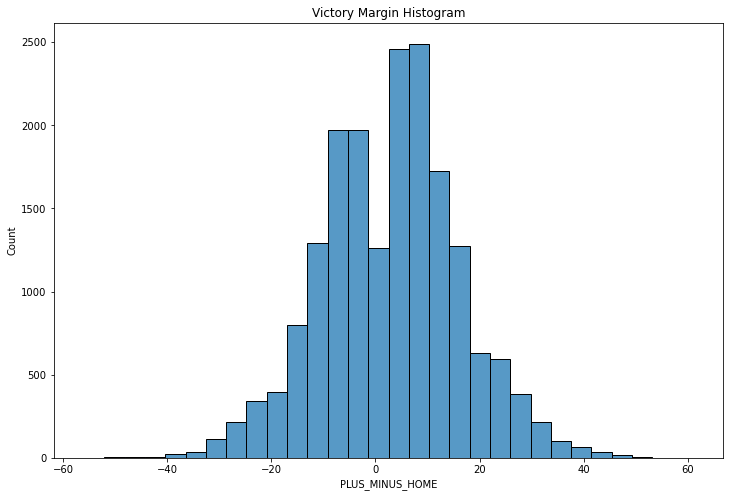

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(data = Game_modified, x = 'PLUS_MINUS_HOME', bins=30
            ).set_title('Victory Margin Histogram')

No outliers visible on some highlighted feature data

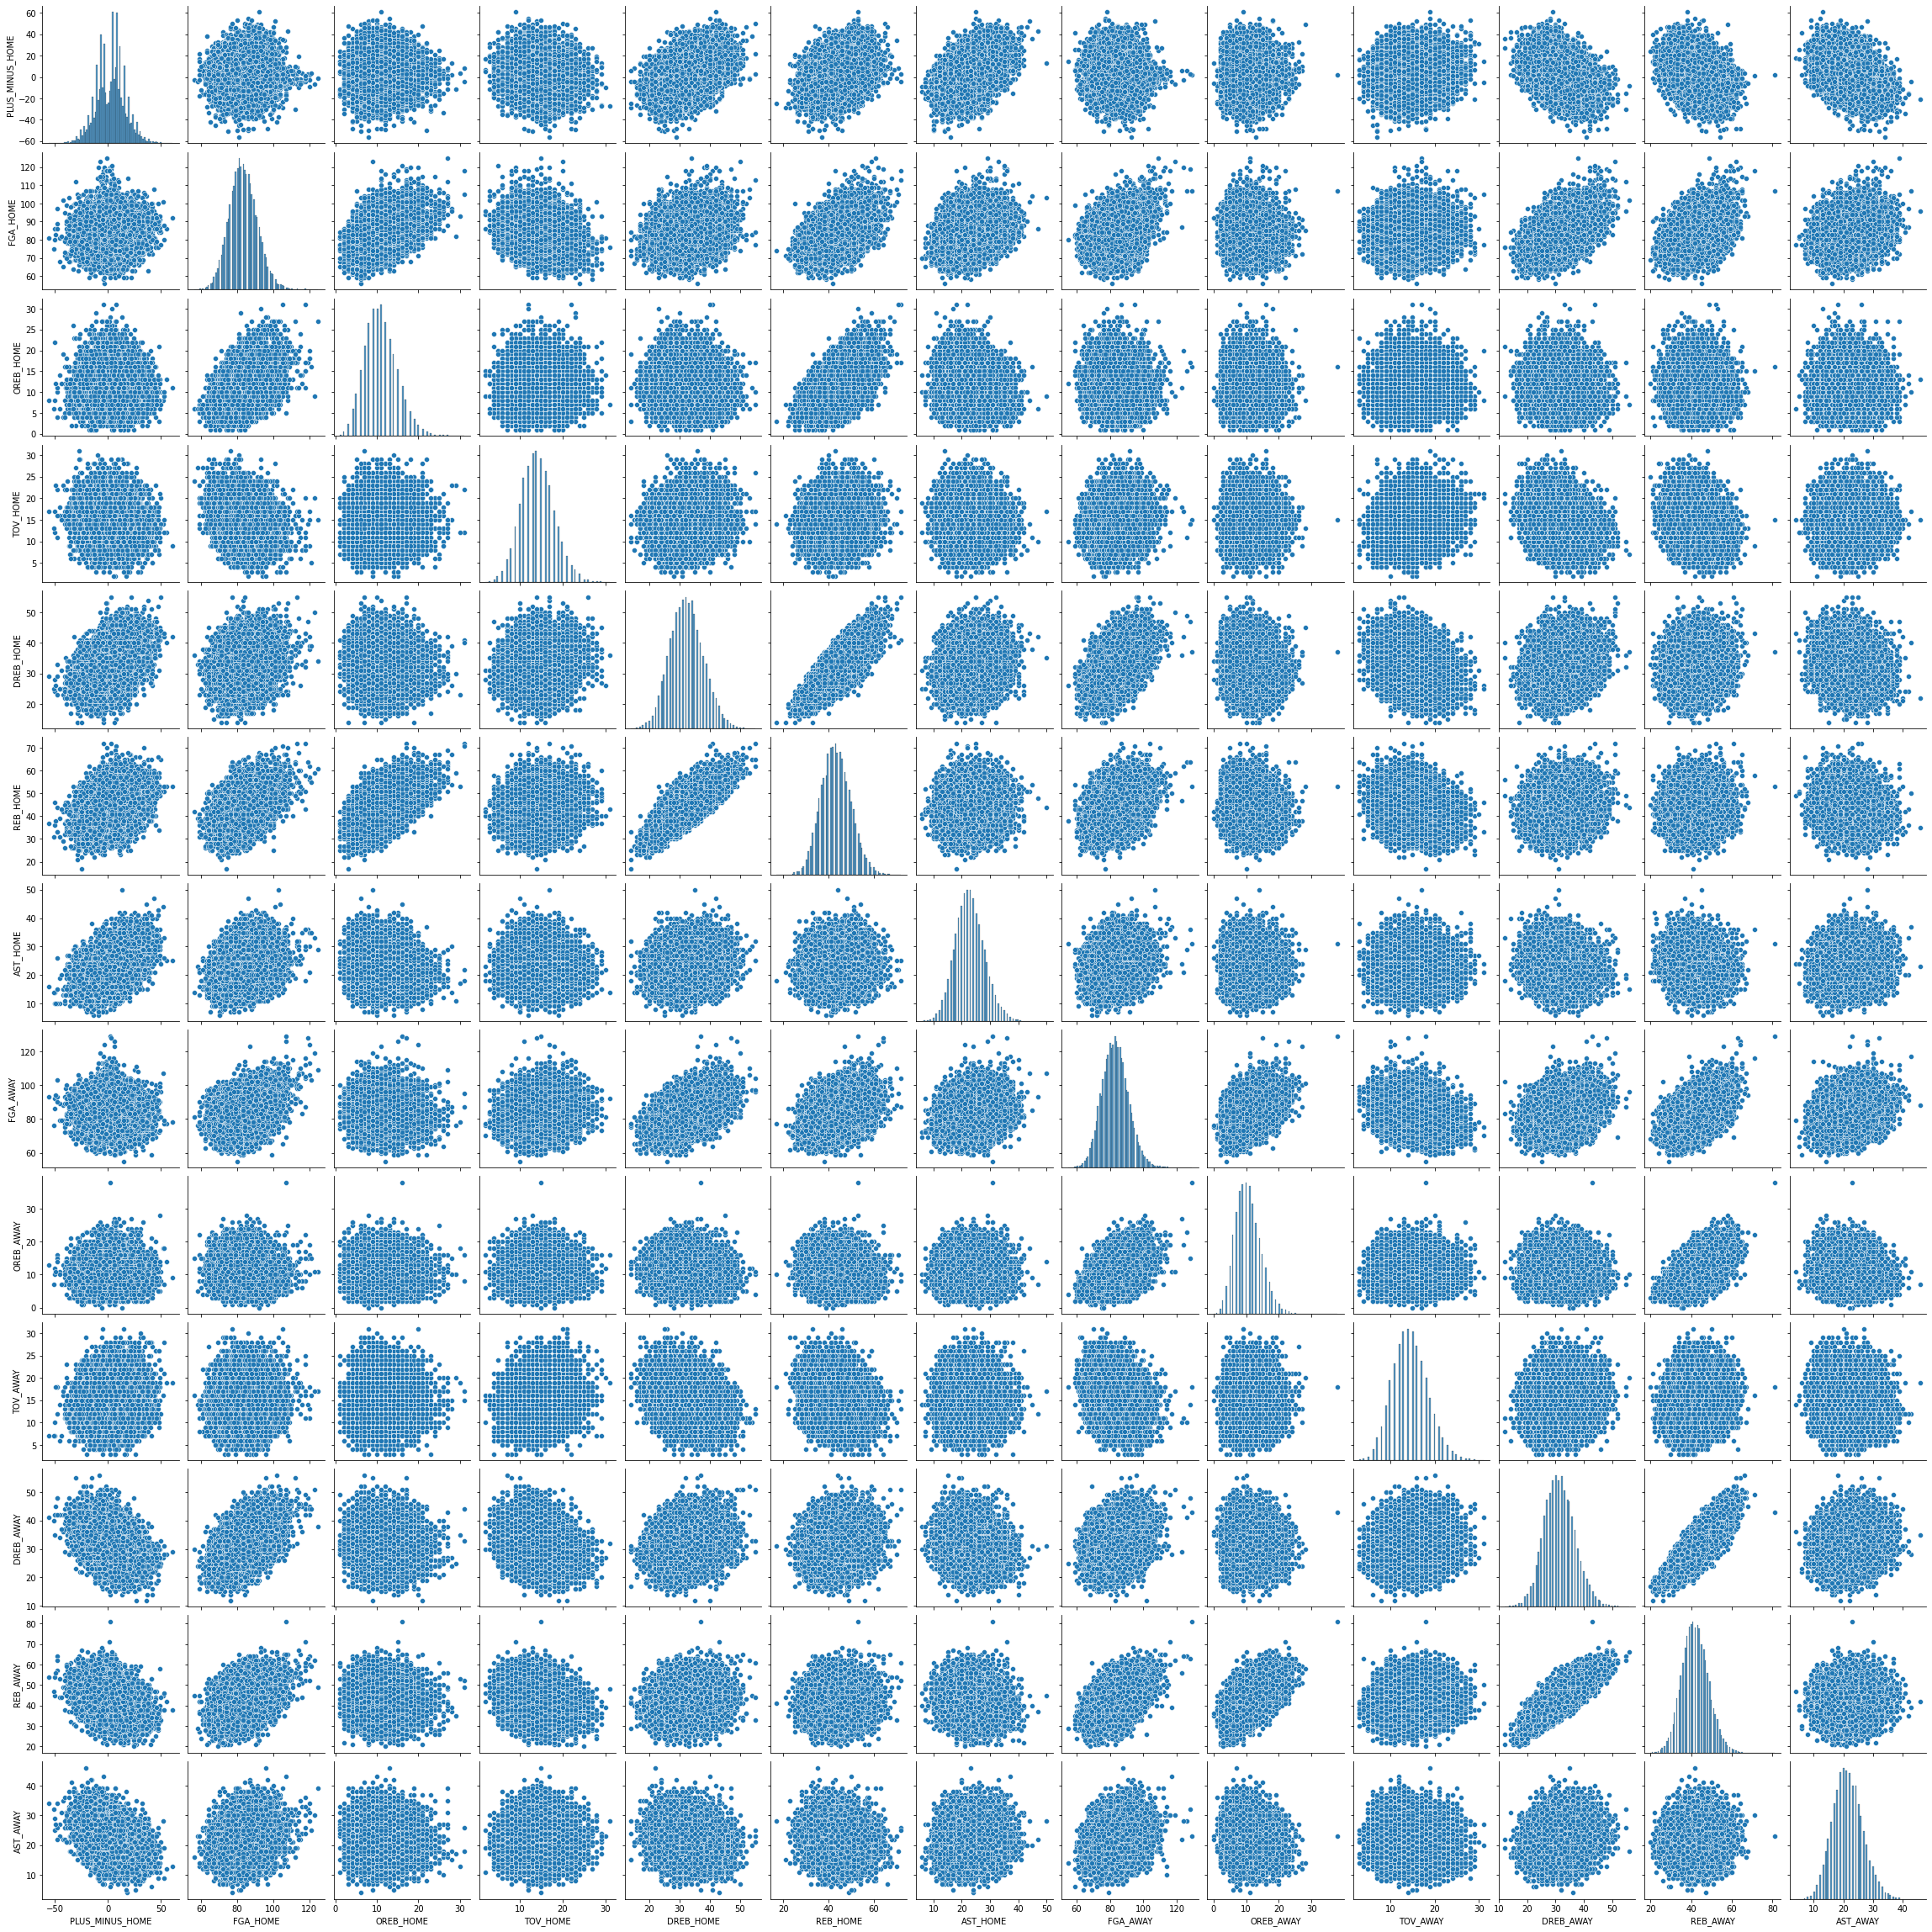

In [33]:
sns.pairplot(Game_modified[['PLUS_MINUS_HOME','FGA_HOME','OREB_HOME','TOV_HOME','DREB_HOME','REB_HOME','AST_HOME',
                           'FGA_AWAY','OREB_AWAY' ,'TOV_AWAY','DREB_AWAY','REB_AWAY','AST_AWAY']])

In [30]:
Game_modified.to_csv('game_cleaned.csv', sep=',')

**Game data historical average**    
outcome label: margin of victory of the game    
training features:     
- if teams in the current season have enough history:    
    - take the average of each game stats prior to current game in the season
- if the teams have less than 10 current season games, 
    - take the weighted average of each game stats prior to the current season and the games stats in the current season prior to the current game up to 10 games. 
- If there are not enough prior season games to make up 10 games in total:
    - the weighted average is adjusted to the number of games available.
    

Generate order for games per team at each season

In [31]:
Game_modified_ordered = sqldf(
    '''
        select *,
            row_number() over (partition by TEAM_ID_HOME, SEASON order by GAME_DATE) as game_order,
            row_number() over (partition by TEAM_ID_HOME, SEASON order by GAME_DATE desc) as game_reverse_order,
            count(GAME_ID) over (partition by TEAM_ID_HOME, SEASON) as total_game_count
        from Game_modified
    '''
)
Game_modified_ordered

,GAME_ID,TEAM_ID_HOME,TEAM_ID_AWAY,GAME_DATE,SEASON,PLUS_MINUS_HOME,MIN_HOME,FGA_HOME,FG_PCT_HOME,FG3A_HOME,...,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,WL_Home_modified,game_order,game_reverse_order,total_game_count
0,20400946,1610612737,1610612764,2005-03-16,2004,-29,240,82.0,0.439,14.0,...,54.0,12.0,18.0,0.0,12.0,9.0,L,1,1,1
1,20500051,1610612737,1610612747,2005-11-08,2005,-6,240,75.0,0.493,15.0,...,52.0,10.0,10.0,0.0,14.0,14.0,L,1,41,41
2,20500068,1610612737,1610612746,2005-11-10,2005,-7,240,91.0,0.407,9.0,...,36.0,10.0,10.0,1.0,18.0,9.0,L,2,40,41
3,20500082,1610612737,1610612763,2005-11-12,2005,-1,240,83.0,0.398,12.0,...,34.0,14.0,2.0,1.0,13.0,13.0,L,3,39,41
4,20500156,1610612737,1610612738,2005-11-23,2005,3,240,72.0,0.556,8.0,...,32.0,13.0,13.0,1.0,18.0,6.0,W,4,38,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188,22000434,1610612766,1610612741,2021-05-06,2020,-21,240,90.0,0.422,35.0,...,50.0,19.0,13.0,0.0,17.0,5.0,L,32,5,36
19189,22001004,1610612766,1610612753,2021-05-07,2020,10,240,89.0,0.494,33.0,...,62.0,20.0,18.0,1.0,7.0,9.0,W,33,4,36
19190,22001020,1610612766,1610612740,2021-05-09,2020,-2,240,95.0,0.442,37.0,...,60.0,21.0,13.0,0.0,16.0,10.0,L,34,3,36
19191,22000448,1610612766,1610612743,2021-05-11,2020,-5,240,91.0,0.462,39.0,...,42.0,10.0,19.0,0.0,17.0,6.0,L,35,2,36


In [32]:
Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == 1610612737) & 
              (Game_modified_ordered['SEASON'] == 2005) & 
              (Game_modified_ordered['game_order'] < 28)]['MIN_HOME'].mean()


241.85185185185185

In [33]:
game_past_data = Game_modified_ordered.copy()

fields don't change with past average:    
* GAME_ID    
* TEAM_ID_HOME    
* TEAM_ID_AWAY    
* GAME_DATE    
* SEASON    
* PLUS_MINUS_HOME    
* WL_Home_modified    


Generate historical game statistic data based on the past games of current and past season of the team playing on current game

In [34]:
# iterate through all columns in the data
for column in game_past_data:
    
    #skip columns that not game states
    if column not in ['GAME_ID','TEAM_ID_HOME','TEAM_ID_AWAY','GAME_DATE',
                      'SEASON','PLUS_MINUS_HOME','WL_Home_modified',
                      'game_order','game_reverse_order','total_game_count']:
        
        for i in range(game_past_data.shape[0]):
            
            current_season_count = game_past_data.iloc[i]['game_order']
            game_id = game_past_data.iloc[i]['GAME_ID']
            team = game_past_data.iloc[i]['TEAM_ID_HOME']
            season = game_past_data.iloc[i]['SEASON']
            
            
            # if there's enough history in current season, 
            # take average of game stats prior to  current game
            if current_season_count>10:
                game_past_data.loc[game_past_data['GAME_ID']== game_id,column] = \
                Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == team) & 
                              (Game_modified_ordered['SEASON'] == season) & 
                              (Game_modified_ordered['game_order'] < current_season_count)][column].mean()
            
            # if there's not enough history in current season
            elif game_past_data.iloc[i]['SEASON'] >= 2005: 
                
                # calculated the number of past season games needed to make 10 games history
                past_season_count_needed = 10 - (current_season_count - 1)
                
                # check the total number of past season games history available
                past_season_max = Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == team) & 
                              (Game_modified_ordered['SEASON'] == season-1)]['total_game_count'].mean()
                
                # if we have enough history from the past season, 
                # calculated the weight for current season and past season
                if past_season_count_needed <= past_season_max:
                    current_season_ratio = (current_season_count - 1)/10
                    past_season_ratio = past_season_count_needed/10
                    past_season_threshold = past_season_count_needed
                
                else:
                # if we do not have enough history from the past season, 
                # calculated the weight for current season and past season based on 
                # the total history available from current season and past season
                    current_season_ratio = (current_season_count - 1)/((current_season_count - 1)+past_season_max)
                    past_season_ratio = past_season_max/((current_season_count - 1)+past_season_max)
                    past_season_threshold = past_season_max
                    
                    
                game_past_data.loc[game_past_data['GAME_ID']== game_past_data.iloc[i]['GAME_ID'],column] = \
                current_season_ratio * Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == team) & 
                              (Game_modified_ordered['SEASON'] == season) & 
                              (Game_modified_ordered['game_order'] < current_season_count)][column].mean() + \
                past_season_ratio * Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == team) & 
                              (Game_modified_ordered['SEASON'] == season - 1) & 
                              (Game_modified_ordered['game_reverse_order'] <= past_season_threshold)][column].mean()
    
    # this was for check on progress
    print(column)
            

GAME_ID
TEAM_ID_HOME
TEAM_ID_AWAY
GAME_DATE
SEASON
PLUS_MINUS_HOME
MIN_HOME
FGA_HOME
FG_PCT_HOME
FG3A_HOME
FG3_PCT_HOME
FTA_HOME
FT_PCT_HOME
OREB_HOME
DREB_HOME
AST_HOME
STL_HOME
BLK_HOME
TOV_HOME
PF_HOME
FGA_AWAY
FG_PCT_AWAY
FG3A_AWAY
FG3_PCT_AWAY
FTA_AWAY
FT_PCT_AWAY
OREB_AWAY
DREB_AWAY
AST_AWAY
STL_AWAY
BLK_AWAY
TOV_AWAY
PF_AWAY
PTS_PAINT_HOME
PTS_2ND_CHANCE_HOME
PTS_FB_HOME
TEAM_TURNOVERS_HOME
TOTAL_TURNOVERS_HOME
TEAM_REBOUNDS_HOME
PTS_OFF_TO_HOME
PTS_PAINT_AWAY
PTS_2ND_CHANCE_AWAY
PTS_FB_AWAY
TEAM_TURNOVERS_AWAY
TOTAL_TURNOVERS_AWAY
TEAM_REBOUNDS_AWAY
WL_Home_modified
game_order
game_reverse_order
total_game_count


### data check

In [35]:
game_past_data[(game_past_data['TEAM_ID_HOME'] == 1610612737) & 
              (game_past_data['SEASON'] == 2005) & 
              (game_past_data['game_order'] == 28)]['FGA_HOME'] \
== Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == 1610612737) & 
              (Game_modified_ordered['SEASON'] == 2005) & 
              (Game_modified_ordered['game_order'] < 28)]['FGA_HOME'].mean()

28    True
Name: FGA_HOME, dtype: bool

In [36]:
game_past_data[(game_past_data['TEAM_ID_HOME'] == 1610612737) & 
              (game_past_data['SEASON'] == 2005) & 
              (game_past_data['game_order'] == 6)]['FGA_HOME'] \
== (5/6) * Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == 1610612737) & 
              (Game_modified_ordered['SEASON'] == 2005) & 
              (Game_modified_ordered['game_order'] < 6)]['FGA_HOME'].mean() \
+ (1/6) * Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == 1610612737) & 
              (Game_modified_ordered['SEASON'] == 2004) & 
              (Game_modified_ordered['game_order'] == 1)]['FGA_HOME'].mean()

6    True
Name: FGA_HOME, dtype: bool

In [37]:
game_past_data[(game_past_data['TEAM_ID_HOME'] == 1610612737) & 
              (game_past_data['SEASON'] == 2006) & 
              (game_past_data['game_order'] == 7)]['FGA_HOME'] \
== (6/10) * Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == 1610612737) & 
              (Game_modified_ordered['SEASON'] == 2006) & 
              (Game_modified_ordered['game_order'] <= 6)]['FGA_HOME'].mean() \
+ (4/10) * Game_modified_ordered[(Game_modified_ordered['TEAM_ID_HOME'] == 1610612737) & 
              (Game_modified_ordered['SEASON'] == 2005) & 
              (Game_modified_ordered['game_reverse_order'] <= 4)]['FGA_HOME'].mean()

48    True
Name: FGA_HOME, dtype: bool

### drop ranking variables and write the data to the file

In [38]:
game_past_data = game_past_data.dropna()
game_past_data.to_csv('game_past_data.csv', sep=',')

**read data from here to continue work on historical game stats data**

In [2]:
game_past_data = pd.read_csv('game_past_data.csv')

**read the team based player cluster data**

In [3]:
team_cluster = pd.read_csv('clusters_by_team.csv')

In [4]:
game_past_data

,Unnamed: 0,GAME_ID,TEAM_ID_HOME,TEAM_ID_AWAY,GAME_DATE,SEASON,PLUS_MINUS_HOME,MIN_HOME,FGA_HOME,FG_PCT_HOME,...,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,WL_Home_modified,game_order,game_reverse_order,total_game_count
0,0,20400946,1610612737,1610612764,2005-03-16,2004,-29,240.000000,82.000000,0.439000,...,54.000000,12.000000,18.000000,0.000000,12.000000,9.000000,L,1,1,1
1,2,20500068,1610612737,1610612746,2005-11-10,2005,-7,240.000000,78.500000,0.466000,...,53.000000,11.000000,14.000000,0.000000,13.000000,11.500000,L,2,40,41
2,3,20500082,1610612737,1610612763,2005-11-12,2005,-1,240.000000,82.666667,0.446333,...,47.333333,10.666667,12.666667,0.333333,14.666667,10.666667,L,3,39,41
3,4,20500156,1610612737,1610612738,2005-11-23,2005,3,240.000000,82.750000,0.434250,...,44.000000,11.500000,10.000000,0.500000,14.250000,11.250000,W,4,38,41
4,5,20500190,1610612737,1610612757,2005-11-27,2005,-2,240.000000,80.600000,0.458600,...,41.600000,11.800000,10.600000,0.600000,15.000000,10.200000,L,5,37,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708,19188,22000434,1610612766,1610612741,2021-05-06,2020,-21,240.806452,87.677419,0.458194,...,47.419355,12.838710,12.903226,0.580645,13.838710,7.483871,L,32,5,36
18709,19189,22001004,1610612766,1610612753,2021-05-07,2020,10,240.781250,87.750000,0.457062,...,47.500000,13.031250,12.906250,0.562500,13.937500,7.406250,W,33,4,36
18710,19190,22001020,1610612766,1610612740,2021-05-09,2020,-2,240.757576,87.787879,0.458182,...,47.939394,13.242424,13.060606,0.575758,13.727273,7.454545,L,34,3,36
18711,19191,22000448,1610612766,1610612743,2021-05-11,2020,-5,240.735294,88.000000,0.457706,...,48.294118,13.470588,13.058824,0.558824,13.794118,7.529412,L,35,2,36


In [5]:
team_cluster

,game_id,team_id_h,cluster_0h,cluster_1h,cluster_2h,cluster_3h,cluster_4h,cluster_5h,cluster_6h,cluster_7h,...,cluster_2a,cluster_3a,cluster_4a,cluster_5a,cluster_6a,cluster_7a,cluster_8a,cluster_9a,cluster_10a,cluster_11a
0,20300001,1610612755,0,0,1,0,1,3,1,0,...,0,0,0,2,1,0,1,6,1,0
1,20300002,1610612759,0,0,1,0,2,2,0,0,...,2,0,0,1,1,0,1,6,0,1
2,20300003,1610612747,1,0,1,0,0,4,2,0,...,1,0,0,1,0,0,0,6,0,1
3,20300004,1610612738,0,0,1,0,2,1,0,0,...,3,0,0,3,0,0,1,3,0,0
4,20300005,1610612752,0,0,1,0,1,1,1,0,...,0,0,0,1,2,0,0,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19419,40600163,1610612743,0,0,2,0,1,2,0,0,...,1,0,0,3,1,0,0,5,1,0
19420,40600171,1610612745,0,0,2,0,0,2,1,0,...,1,0,1,2,1,0,1,4,1,0
19421,40600172,1610612745,0,0,2,0,0,2,1,0,...,1,0,1,2,1,0,1,4,1,0
19422,40600173,1610612762,1,0,1,0,1,2,1,0,...,2,0,0,2,1,0,0,5,1,1


## Join game_past_data table to the clusters of players

In [16]:
nba_data = pd.merge(
    game_past_data,
    team_cluster,
    how="inner",
    left_on='GAME_ID',
    right_on='game_id'
)

In [17]:
nba_data = nba_data.drop(['Unnamed: 0','game_id','team_id_h', 'team_id_a',
                         'game_order','game_reverse_order','total_game_count'], axis = 1)

In [18]:
nba_data.to_csv('nba_final_data.csv', sep=',', index=False)

## nba_final_data is the final data used for training different machine learning models